Boosting trees
AdaBoost and Random Forest comparison from https://github.com/mbeyeler/opencv-machine-learning/blob/master/notebooks/10.04-Implementing-AdaBoost.ipynb

Extreme Gradient Boosting XGBoost
    Introduction: https://xgboost.readthedocs.io/en/latest/tutorials/model.html
    Code https://github.com/dmlc/xgboost 
    Tutorials 
        https://www.datacamp.com/community/tutorials/xgboost-in-python

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=456)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 


In [2]:
X = cancer.data
y = cancer.target

In [3]:
print("{} {} {} {}".format( cancer.target_names, cancer.data.shape, 
                           cancer.target.shape, cancer.feature_names))

['malignant' 'benign'] (569, 30) (569,) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
X.mean(axis=0)

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [5]:
import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(len(cancer.feature_names))

In [6]:
proc_X = np.log(X)
# proc_X = X

/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


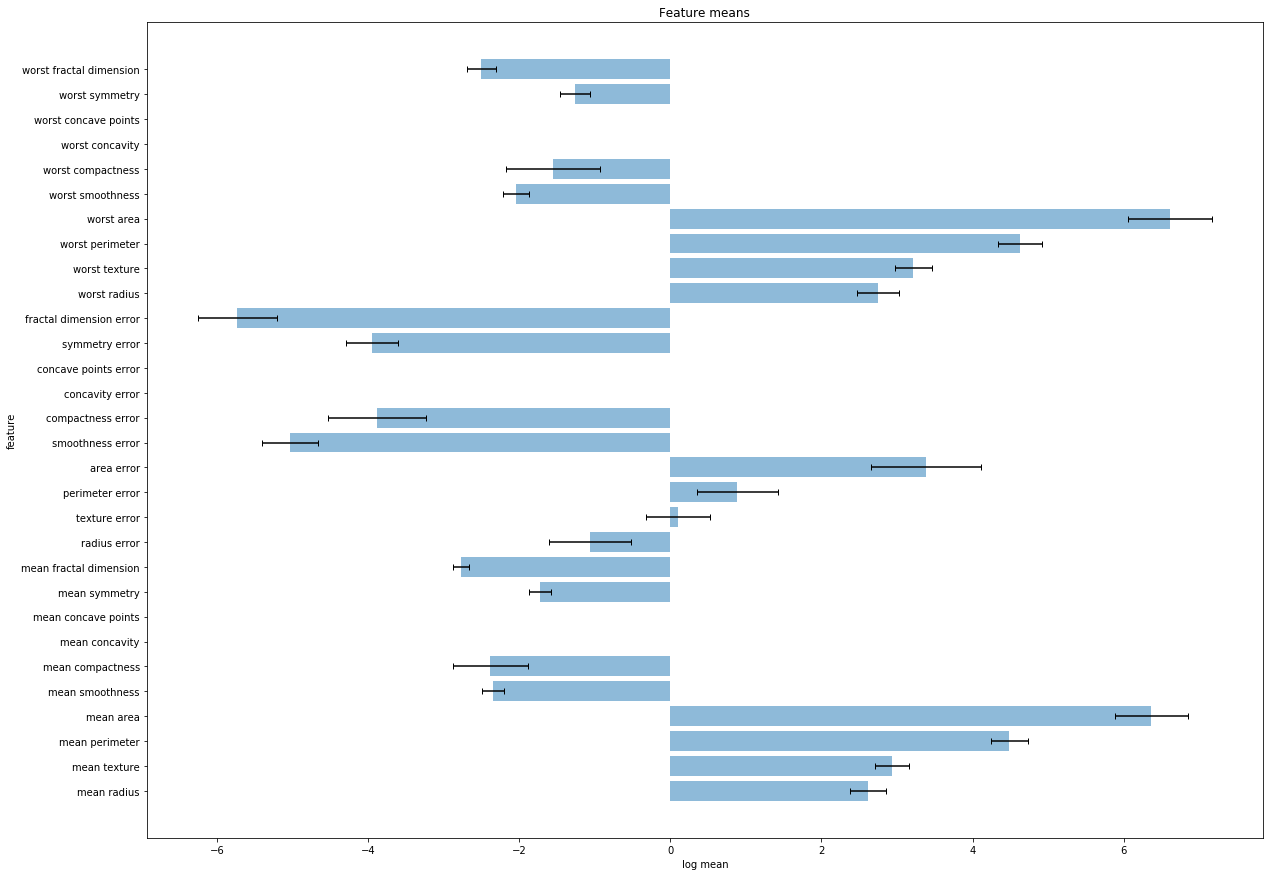

In [7]:
fig, ax = plt.subplots(figsize=(20,15))
ax.barh(y_pos, proc_X.mean(axis=0), align='center', alpha=0.5, xerr=proc_X.std(axis=0), capsize=3)
ax.set_title("Feature means")
ax.set_ylabel("feature")
ax.set_xlabel("log mean")
ax.set_yticks(y_pos)

_ = ax.set_yticklabels(cancer.feature_names)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=784, test_size=0.2)
print("train {} {}, test {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

train (455, 30) (455,), test (114, 30) (114,)


In [9]:
ada.fit(X_train, y_train)
print("Adaboost test score {}".format(ada.score(X_test, y_test) ))


Adaboost test score 0.9385964912280702


In [10]:
from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=456)
forest1.fit(X_train, y_train)
print("Random forest stumps test score = {}".format(forest1.score(X_test, y_test)))


Random forest stumps test score = 0.9035087719298246


In [11]:
forest_deep = RandomForestClassifier(n_estimators=100, random_state=456)
forest_deep.fit(X_train, y_train)
print("Random forest any depth test score = {}".format(forest_deep.score(X_test, y_test)))

Random forest any depth test score = 0.956140350877193


In [12]:
import pandas as pd
data = pd.DataFrame(cancer.data)
data.columns = cancer.feature_names
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data['cancer'] = cancer.target

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [16]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
print("data {} {}".format(X.shape, y.shape))

data (569, 30) (569,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=784, test_size=0.2)
print("train {} {}, test {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

train (455, 30) (455,), test (114, 30) (114,)


In [42]:
import xgboost as xgb
# xg_model = xgb.XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=50)
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train, y_train)
y_test_preds = xg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))
print("RMSE {}".format(rmse))
from sklearn.metrics import accuracy_score
print("accuracy={:.3}".format( accuracy_score(y_test, y_test_preds) ) )

RMSE 0.20942695414584775
accuracy=0.956


In [43]:
data_matrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.468451,0.001195,0.470888,0.002077
1,0.436933,0.002375,0.442178,0.003709
2,0.409823,0.002280,0.416560,0.005534
3,0.384049,0.003895,0.392778,0.005888
4,0.362130,0.004334,0.372020,0.006609


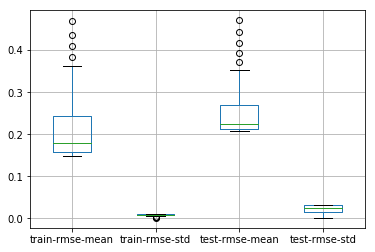

In [44]:
cv_results.boxplot()